# Algo - graphes aléatoires

Comment générer un graphe aléatoire... Générer une séquence de nombres aléatoires indépendants est un problème connu et plutôt bien résolu. Générer une structure aléatoire comme une graphe est aussi facile. En revanche, générer un graphe aléatoire vérifiant une propriété - la distribution des degrés - n'est pas aussi simple qu'anticipé.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Graphe aléatoire - matrice d'adjacence aléatoire

L'existence de chaque arc est défini par une variable binomiale de paramètre $p$.

In [3]:
import numpy

mat = numpy.random.random((15, 15))
mat = mat + mat.T
adja = (mat >= 1.4).astype(int)
for i in range(adja.shape[0]):
    adja[i ,i] = 0
adja

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]])

En le visualisant...

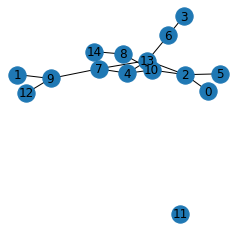

In [4]:
import networkx
import matplotlib.pyplot as plt
fix, ax = plt.subplots(1, 1,figsize=(4,4))
G = networkx.from_numpy_matrix(adja)  
networkx.draw(G, with_labels=True, ax=ax) 

In [5]:
degres = adja.sum(axis=1)
degres

array([1, 1, 4, 1, 3, 1, 2, 4, 2, 3, 4, 0, 1, 5, 2])

In [6]:
distrib = {}
for d in degres:
    if d in distrib:
        distrib[d] += 1
    else:
        distrib[d] = 1
distrib

{1: 5, 4: 3, 3: 2, 2: 3, 0: 1, 5: 1}

## Vocabulaire lié aux graphes

* **arc (ou edge en anglais)** : lien liant deux noeuds, il peut être **orienté** ou non, s'il est orienté, les deux extrémités ne jouent pas le même rôle, l'arc ne peut être "parcouru" que de la première extrémité vers la seconde.
* **noeud (vertex en anglais)** : élément du graphe
* **graphe** : un graphe est défini par un ensemble de noeuds et un ensemble d'arcs
* **matrice d'adjacence** : matrice binaire de dimension $N \times N$, $A=(a_{ij})_{ij}$ et $a_{ij} = 1$ s'il existe un arc reliant le noeud *i* à *j*, 0 sinon.
* **chemin** : séquence de noeuds et d'arcs appartenant au graphe
* **prédécesseur et successeur** : si un arc orienté relie les noeuds *i* à *j*, *i* est le prédecesseur de *j*, *j* est le successeur de *i*. Par extension, si *i* apparaît toujours avec *j* dans tous les chemins possibles du graphes, *i* est un prédecesseur de *j*.
* **arbre** : cas particulier des graphes orientés, il existe un unique prédecesseur à tous les noeuds nommés la racine, un noeud sans successeur est appelé **feuille (ou leaf en anglais)**. Dans un arbre binaire, chaque noeud n'a que deux successeurs directs.
* **degré d'un noeud** : nombre d'arcs connectés à un noeud, on peut distinguer pour les graphes orientés le fait que les arcs partent ou arrivent à un noeud
* **Composante connexe** : au sein d'une composante connexe, il existe toujours un chemin reliant n'importe quelle paire de noeuds.

Quelques propriétés de la matrice d'adjacence :

* Pour un graphe non orienté, la matrice d'adjacence est symétrique.
* La somme sur la ligne *i* est égale au degré du noeud *i*.
* La matrice d'adjacence est triangulaire supérieue dans le cas d'un arbre dont les noeuds sont numérotés en largeur d'abord (un noeud a toujours un numéro supérieur à tous des niveaux moins profonds).

## Aparté : matrice d'adjacence à la puissance n

Si $A$ est une matrice d'adjacence, $a^2_{ik}$ et un coefficient de cette matrice. $a^2_{ik} \sum_j a_{ij} a_{jk}$. Comme $a_{pq} \in \{0, 1\}$, $a^2_{ik} > 0$ s'il existe un $j$ tel que $ a_{ij} = a_{jk} = 1$. Autrement dit, les noeuds $i j, k$ sont reliés. Si $a^2_{ik} > 0$, alors il existe un chemin de longueur 2 entre les noeuds $i, k$. Par récurrent, $A^3_{pq}$ est positif s'il existe un chemin de longueur 3 reliant les noeuds $p, q$.

On calcule $\sum{A}=A + A^2 + A^3 + ... + A^n$ où n est la dimension de la matrice.

In [7]:
adjan = adja.copy()
conne = numpy.zeros(adja.shape)
for i in range(1, adja.shape[0]):
    conne += adjan
    adjan = adjan @ adja
(conne > 0).astype(int)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]])

D'après les remarques précédentes, $\sum A_{pq} > 0$ s'il existe un chemin reliant les noeuds $p, q$, donc s'il font partie de la même composante connexe. Et 0 si les deux noeuds font partie de deux composantes connexes distinctes.

## Trouver le nombre de composantes connexes

On s'inspire d'un algorithme de coloriage. Au début, chaque noeud appartient à sa propre composante connexe noté $c_i$. Pour chaque arc reliant deux noeuds *i* et *j*, on associe aux deux noeuds à la composante $\min(c_i, c_j)$. On continue tant qu'un noeud change de composante connexe.

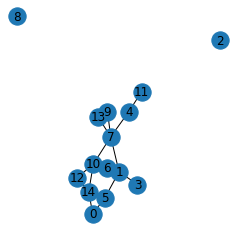

In [8]:
mat = numpy.random.random((15, 15))
mat = mat + mat.T
adja = (mat >= 1.45).astype(int)
for i in range(adja.shape[0]):
    adja[i ,i] = 0

fix, ax = plt.subplots(1, 1, figsize=(4, 4))
G = networkx.from_numpy_matrix(adja)  
networkx.draw(G, with_labels=True, ax=ax) 

In [9]:
C = numpy.arange(adja.shape[0])
maj = 1
while maj > 0:
    maj = 0
    for i in range(adja.shape[0]):
        for j in range(i + 1, adja.shape[1]):
            if adja[i, j] > 0 and C[i] != C[j]:
                maj += 1
                C[i] = C[j] = min(C[i], C[j])
                
C

array([0, 0, 2, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0])

In [10]:
set(C)

{0, 2, 8}

In [11]:
print("Il y a %r composantes connexes." % len(set(C)))

Il y a 3 composantes connexes.


## Génération d'un graphe aléatoire

Les graphes issues de réseaux sociaux ont souvent des propriétés statistiques particulières. La distribution des degrés des noeuds suit souvent une loi à queue épaisse. C'est dans cette catégorie qu'on range les lois qui admettent une espérance mais pas de variance.

Donc on ne veut pas générer n'importe quel graphe aléatoire, on veut générer un graphe aléatoire dont la distribution des degrés des noeuds est connue.

On s'inspire de [algorithme graphe aléatoire](http://www.proba.jussieu.fr/pageperso/rebafka/BookGraphes/graphes-scale-free.html).

**Etape 1 :** transformer une distribution des degrés des noeuds en une liste de degré souhaité pour chaque noeud.

In [12]:
def distribution_to_degree_list(hist):
    N = int(hist.sum())
    deg = numpy.zeros(N, dtype=numpy.int32)
    p = 0
    for i, nh in enumerate(hist):
        for n in range(nh):
            deg[p] = i
            p += 1
    return deg
        
dist = numpy.array(numpy.array([0, 4, 3, 2]))
distribution_to_degree_list(dist)

array([1, 1, 1, 1, 2, 2, 2, 3, 3])

**Etape 2 :** on part d'un tableau de même dimension qui représente les degrés du graphe en cours de construction. Il est nul au départ. On tire des noeuds de façon aléatoire tant que ce degré est inférieur au degré souhaité. On l'incrémente à chaque fois qu'un arc est créé.

### Version 1

In [13]:
import warnings
from tqdm import tqdm  # pour visualiser la progression de l'algorithme


def random_graph(distribution_degree):
    degrees = distribution_to_degree_list(distribution_degree)
    current = numpy.zeros(degrees.shape[0], dtype=numpy.int32)
    expected = degrees.sum()
    adja = numpy.zeros((degrees.shape[0], degrees.shape[0]), dtype=numpy.int32)
    nb = 0
    
    # tqdm: une boucle qui affiche l'avancement dans un notebook
    # on évite la boucle infinie en limitant le nombre d'itération 
    loop = tqdm(range(expected * 5))
    for n_iter in loop:
        loop.set_description("sum=%r expected=%r" % (nb, expected))
        nodes = [i for i, (c, d) in enumerate(zip(current, degrees)) 
                 if c < d]
        if len(nodes) == 1:
            i, j = 0, 0
        elif len(nodes) == 2:
            di, dj = 0, 0
            i, j = nodes[di], nodes[dj]
        else:
            di, dj = numpy.random.randint(0, len(nodes), 2)
            i, j = nodes[di], nodes[dj]
        if i == j or adja[i, j] == 1:
            # arc déjà créé ou impossible
            continue
        current[i] += 1
        current[j] += 1
        adja[i, j] = 1
        adja[j, i] = 1
        nb += 2
        
        if nb >= expected:
            # Tous les noeuds ont le degré souhaité.
            loop.set_description("sum=%r expected=%r" % (nb, expected))
            break

    if nb < expected:
        warnings.warn("Graphe incomplet\ndegrees=%r\ncurrent=%r" % (degrees, current))
    return adja

adja = random_graph(numpy.array([0, 5, 3, 2]))
adja

sum=14 expected=17: 100%|██████████| 85/85 [00:00<00:00, 804.03it/s]
<ipython-input-13-a15e00332861>:42: UserWarning: Graphe incomplet
degrees=array([1, 1, 1, 1, 1, 2, 2, 2, 3, 3])
current=array([1, 1, 1, 1, 1, 2, 2, 1, 1, 3])
  warnings.warn("Graphe incomplet\ndegrees=%r\ncurrent=%r" % (degrees, current))


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0]])

On remarque que la somme des degrés ne peut être impaire car chaque arc est connecté à deux noeuds.

In [14]:
adja = random_graph(numpy.array([0, 4, 3, 2]))
adja

sum=12 expected=16: 100%|██████████| 80/80 [00:00<00:00, 1145.86it/s]
<ipython-input-13-a15e00332861>:42: UserWarning: Graphe incomplet
degrees=array([1, 1, 1, 1, 2, 2, 2, 3, 3])
current=array([1, 1, 1, 1, 2, 1, 2, 3, 0])
  warnings.warn("Graphe incomplet\ndegrees=%r\ncurrent=%r" % (degrees, current))


array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

On regarde la distribution des degrés :

In [15]:
adja.sum(axis=1)

array([1, 1, 1, 1, 2, 1, 2, 3, 0])

In [16]:
from collections import Counter
Counter(adja.sum(axis=1))

Counter({1: 5, 2: 2, 3: 1, 0: 1})

L'algorithme ne semble pas aboutir à un graphe qui répond au critère souhaité. Il existe deux cas pour lesquels l'algorithme reste bloqué. On note $A_t$ l'ensemble des noeuds à l'itération *t* dont les degrés sont inférieurs au degré souhaité.

* Tous les noeuds dans l'ensemble $A_t$ sont déjà reliés entre eux.
* La seule option possible est de créer un arc entre un noeud et lui-même.

Pour éviter cela, on choisit après 5 tirages ne donnant lieu à aucune création d'arc d'en supprimer quelques-uns. L'algorithme qui suit n'est pas le plus efficace mais voyons déjà s'il marche avant de nous pencher sur un autre.

### Version 2

In [17]:
def random_graph_remove(distribution_degree):
    degrees = distribution_to_degree_list(distribution_degree)
    current = numpy.zeros(degrees.shape[0], dtype=numpy.int32)
    expected = degrees.sum()
    adja = numpy.zeros((degrees.shape[0], degrees.shape[0]), dtype=numpy.int32)
    nb = 0
    
    loop = tqdm(range(expected * 5))
    last_added = 0
    n_removed = 0
    edges = {i: [] for i in range(current.shape[0])}
    for n_iter in loop:
        loop.set_description("sum=%r expected=%r n_removed=%r" % (nb, expected, n_removed))
        nodes = [i for i, (c, d) in enumerate(zip(current, degrees)) 
                 if c < d]
        if len(nodes) > 1:
            di, dj = numpy.random.randint(0, len(nodes), 2)
            i, j = nodes[di], nodes[dj]
        else:
            i = j = 0
        
        if i == j or adja[i, j] == 1:
            if last_added + 5 < n_iter:
                # on supprime un arc
                nodes = [i for i, c in enumerate(current) if c > 0]
                di = (0 if len(nodes) <= 1 else 
                      numpy.random.randint(0, len(nodes)))
                i = nodes[di]
                dh = (0 if len(edges[i]) <= 1 else
                      numpy.random.randint(0, len(edges[i])))
                j = edges[i][dh]
                
                adja[i, j] = 0
                adja[j, i] = 0
                edges[i].remove(j)
                edges[j].remove(i)
                current[i] -= 1
                current[j] -= 1
                nb -= 2
                n_removed += 2
            continue

        current[i] += 1
        current[j] += 1
        adja[i, j] = 1
        adja[j, i] = 1
        nb += 2
        last_added = n_iter
        edges[i].append(j)
        edges[j].append(i)
        
        if nb >= expected:
            # Tous les noeuds ont le degré souhaité.
            loop.set_description("sum=%r expected=%r n_removed=%r" % (nb, expected, n_removed))
            break

    if nb < expected:
        warnings.warn("Graphe incomplet\ndegrees=%r\ncurrent=%r" % (degrees, current))
    return adja

adja = random_graph_remove(numpy.array([0, 4, 3, 2]))
adja

sum=16 expected=16 n_removed=0:   9%|▉         | 7/80 [00:00<00:00, 638.07it/s]


array([[0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 1, 1, 0]])

In [18]:
Counter(adja.sum(axis=1))

Counter({1: 4, 2: 3, 3: 2})

Il est possible que cet algorithme aboutisse au résultat souhaité même avec beaucoup de temps. Est-ce la stratégie ou le fait que la distribution des noeuds ne soit pas [réalisable](http://www.proba.jussieu.fr/pageperso/rebafka/BookGraphes/graphes-scale-free.html#suite-de-degr%C3%A9s-r%C3%A9alisable).

In [19]:
def distribution_degree_realisable(distribution):
    degrees = -numpy.array(sorted(-distribution_to_degree_list(distribution)))
    if degrees.sum() % 2 != 0:
        return False
    sumdi = 0
    for i in range(degrees.shape[0] - 1):
        sumdi += degrees[i]
        mindi = numpy.minimum(degrees[i+1:], i + 1).sum()
        if sumdi >= i * (i + 1) + mindi:
            return False
    return True

distribution_degree_realisable(numpy.array([0, 2, 0, 0, 0, 0, 0, 0, 0, 1]))

False

In [20]:
distribution_degree_realisable(numpy.array([0, 4, 3, 2]))

True

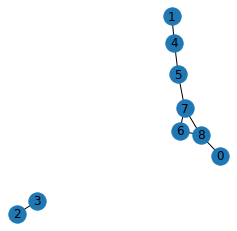

In [21]:
fix, ax = plt.subplots(1, 1, figsize=(4, 4))
G = networkx.from_numpy_matrix(adja)  
networkx.draw(G, with_labels=True, ax=ax) 

Pour ce type de structure, la génération aléatoire est d'autant plus rapide qu'il y a peu de tirages rejetés.